# Combine IMERG and IBTrACS

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import ocha_stratus as stratus
import matplotlib.pyplot as plt

from src.datasources import ibtracs
from src.constants import *

In [3]:
df_storms = ibtracs.load_storms()

In [4]:
df_storms

,storm_id,sid,atcf_id,season,number,name,provisional,created_at
0,10de2ba4-60a5-4608-984e-589c57274fde,1842298N11080,None,1842,1,NOT_NAMED,False,2025-04-30 21:10:39.349070
1,0e7a8be2-9eac-4284-9e63-c88ec79d6484,1845336N10074,None,1845,1,NOT_NAMED,False,2025-04-30 21:10:39.349070
2,46a6cd73-9507-4616-9e3a-0ac1202c6e6b,1848011S09079,None,1848,1,NOT_NAMED,False,2025-04-30 21:10:39.349070
3,0cd16a53-de4b-4ef6-8f53-f4ced8a493d4,1848011S09080,None,1848,2,NOT_NAMED,False,2025-04-30 21:10:39.349070
4,c8fd7af9-d873-4de8-a982-01cacd270a5d,1848011S15057,None,1848,3,NOT_NAMED,False,2025-04-30 21:10:39.349070
...,...,...,...,...,...,...,...,...
13806,8f0e1d39-cb79-4cc2-beef-ead5ba7b0dfb,2024123S09045,SI232024,2024,23,HIDAYA,True,2025-04-30 21:10:39.349070
13807,38ee5746-a459-481a-ba0a-4205200694e8,2024138S09053,SI242024,2024,24,IALY,True,2025-04-30 21:10:39.349070
13808,2464ffa1-5832-4bf5-9974-9ea1127d9fc6,2024141S02075,SI252024,2024,25,NOT_NAMED,True,2025-04-30 21:10:39.349070
13809,1df8c064-da92-496e-be46-9174bd9c5fdc,2024146N11126,WP012024,2024,26,EWINIAR,True,2025-04-30 21:10:39.349070


In [5]:
blob_name = f"{PROJECT_PREFIX}/processed/storm_stats/zma_stats.parquet"

In [6]:
df_stats = stratus.load_parquet_from_blob(blob_name)

In [7]:
df_stats = df_stats.merge(df_storms)
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,max_roll2_mean,storm_id,atcf_id,season,number,name,provisional,created_at
0,2023152N26274,2023-06-03 18:00:00.000039,2023-06-04 06:00:00.000039,25.0,53.528820,94bf652c-249c-47d7-92e6-0235cef19721,AL022023,2023,18,ARLENE,True,2025-04-30 21:10:39.349070
1,2023239N21274,2023-08-26 12:00:00.000039,2023-08-29 12:00:00.000039,70.0,33.697277,31ea21aa-7609-4e3d-baff-745b9ee35380,AL102023,2023,46,IDALIA,True,2025-04-30 21:10:39.349070
2,2023321N15278,2023-11-17 21:00:00.000039,2023-11-18 00:00:00.000039,30.0,41.093265,afebc08d-1e67-4d6d-90fd-d7d6c9b6147d,AL222023,2023,79,NOT_NAMED,True,2025-04-30 21:10:39.349070


Text(0, 0.5, 'Total 2-day precipitation, average over whole country (mm)')

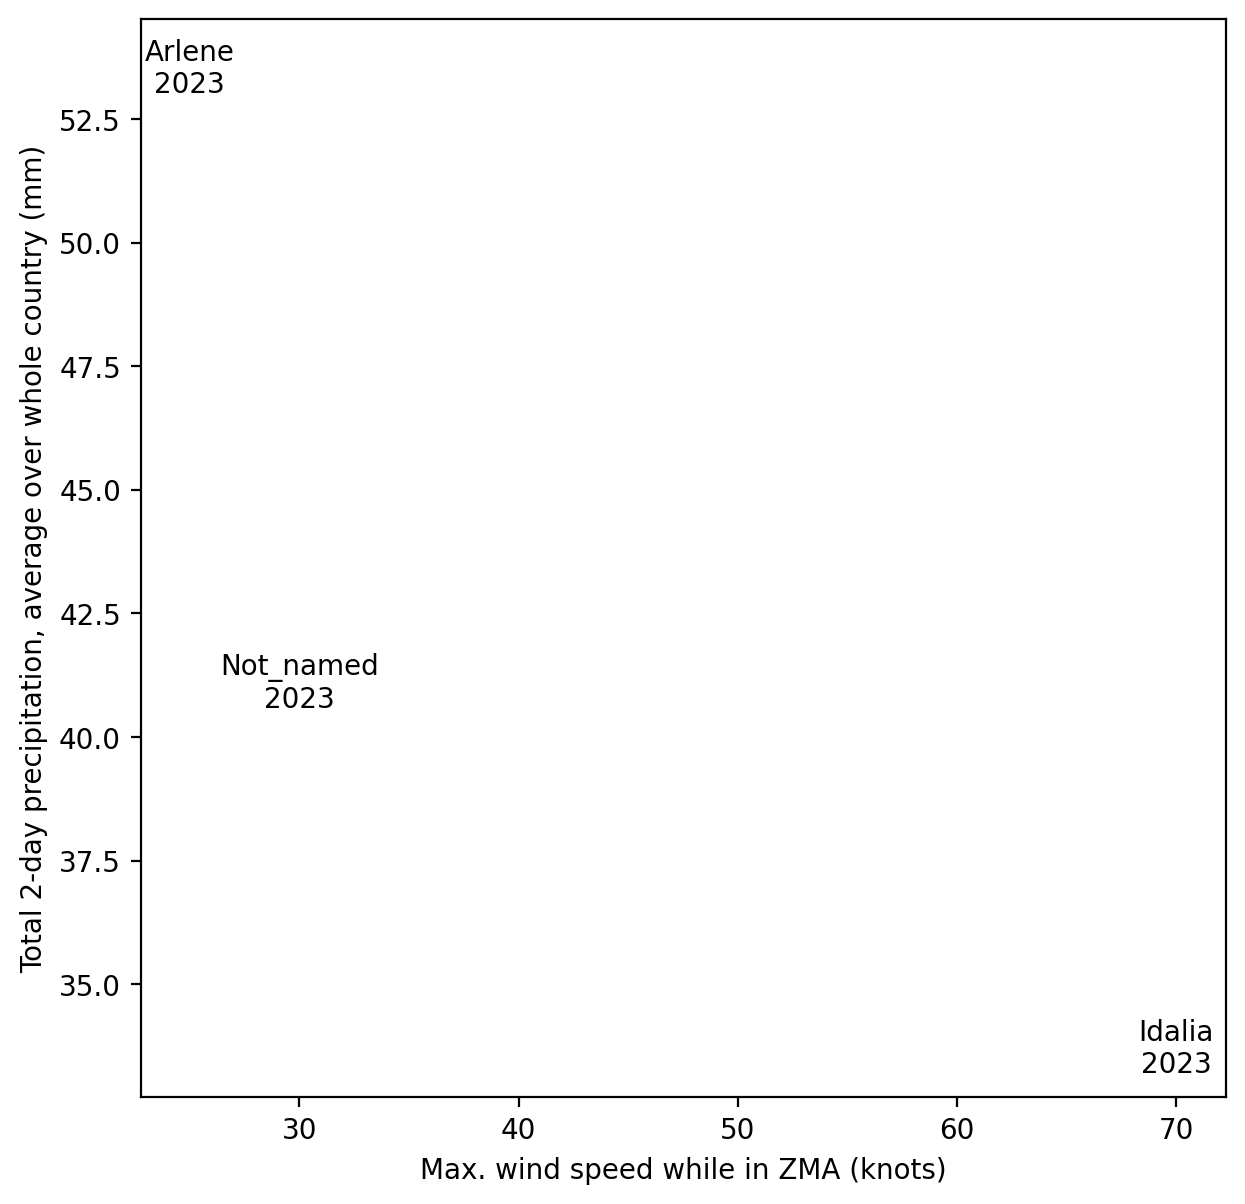

In [8]:
fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

df_stats.plot(
    x="wind_speed_max", y="max_roll2_mean", linewidth=0, ax=ax, legend=False
)

for _, row in df_stats.iterrows():
    ax.annotate(
        row["name"].capitalize() + "\n" + str(row["season"]),
        (row["wind_speed_max"], row["max_roll2_mean"]),
        ha="center",
        va="center",
    )

ax.set_xlabel("Max. wind speed while in ZMA (knots)")
ax.set_ylabel("Total 2-day precipitation, average over whole country (mm)")